# Visualization of synthetic datasets


**Requisites**
- `cmocean`

In [8]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cmocean
%matplotlib inline

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import downsample_dataframe
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
plt.rcParams['axes.linewidth'] = 2.5
#plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

cmap = cmocean.cm.solar

In [10]:
synth_name  = ["basic", "soil", "weather", "soil_weather"]
df          = {}
df_day      = {}
index       = 13
for name in synth_name:
    path_to_zip = "../data/raw/synthetic_" + name + ".zip"
    df[name]    = import_df_from_zip_pkl(path_to_zip, index=index, verbose=False)
    # remove february 29th
    df[name][(df[name].index.day != 29) & (df[name].index.month != 2)]
    df_day[name] = downsample_dataframe(df[name], night_method="basic", clip_method="universal")

One synthetic type

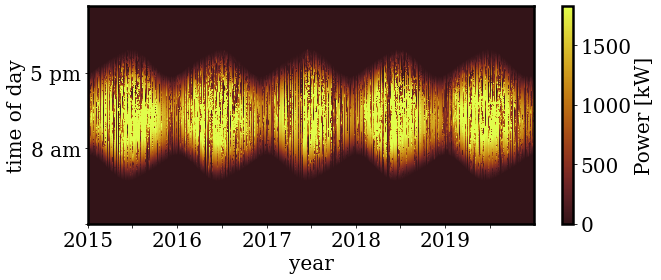

In [21]:
name    = synth_name[3]

days    = np.unique(df[name].index.date)
minutes = np.unique(df[name].minute_of_day)

yi, xi  = np.meshgrid(minutes, days)
zi      = df[name].Power.to_numpy()

fig, ax = plt.subplots(figsize=(10, 4))
im = ax.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
fig.colorbar(im, label="Power [kW]")

labels_x = [item.get_text() for item in ax.get_xticklabels()]
labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y = ["", "8 am", "5 pm"]
labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
ax.set_yticklabels(labels_y)
ax.set_xticklabels(labels_x)#, rotation=45)
ax.set_xlabel("year")
ax.set_ylabel("time of day")
fig.savefig("../../plots/power_" + name + ".png", bbox_inches='tight')

Generalize to all types

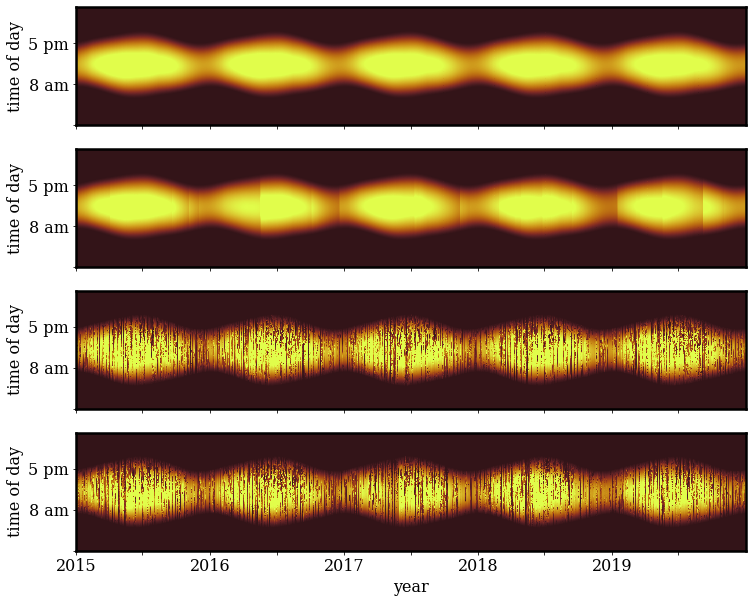

In [7]:
fig, ax = plt.subplots(len(synth_name), 1, figsize=(12, 10), sharex=True)

for i in range(len(synth_name)):
    
    name    = synth_name[i]
    
    days    = np.unique(df[name].index.date)
    minutes = np.unique(df[name].minute_of_day)
    
    yi, xi  = np.meshgrid(minutes, days)
    zi      = df[name].Power.to_numpy()
    
    im = ax[i].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
    if i==(len(synth_name)-1):
        ax[i].set_xlabel("year")
        labels_x = [item.get_text() for item in ax[i].get_xticklabels()]
        labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
        ax[i].set_xticklabels(labels_x)#, rotation=45)
    
    labels_y = [item.get_text() for item in ax[i].get_yticklabels()]
    labels_y = ["", "8 am", "5 pm"]
    ax[i].set_yticklabels(labels_y)
    ax[i].set_ylabel("time of day")
#fig.savefig("../../plots/power_all.png", bbox_inches='tight')

**Downsampling**

In [ ]:
fig, ax = plt.subplots(len(synth_name), 1, figsize=(12, 10), sharex=True)

for i in range(len(synth_name)):
    
    name    = synth_name[i]
    
    days    = np.unique(df[name].index.date)
    minutes = np.unique(df[name].minute_of_day)
    
    yi, xi  = np.meshgrid(minutes, days)
    zi      = df[name].Power.to_numpy()
    
    im = ax[i].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
    if i==(len(synth_name)-1):
        ax[i].set_xlabel("year")
        labels_x = [item.get_text() for item in ax[i].get_xticklabels()]
        labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
        ax[i].set_xticklabels(labels_x)#, rotation=45)
    
    #labels_y = [item.get_text() for item in ax[i].get_yticklabels()]
    #labels_y = ["", "8 am", "5 pm"]
    ax[i].set_yticklabels(labels_y)
    ax[i].set_ylabel("time of day")
fig.savefig("../../plots/power_all_downsampling.png", bbox_inches='tight')

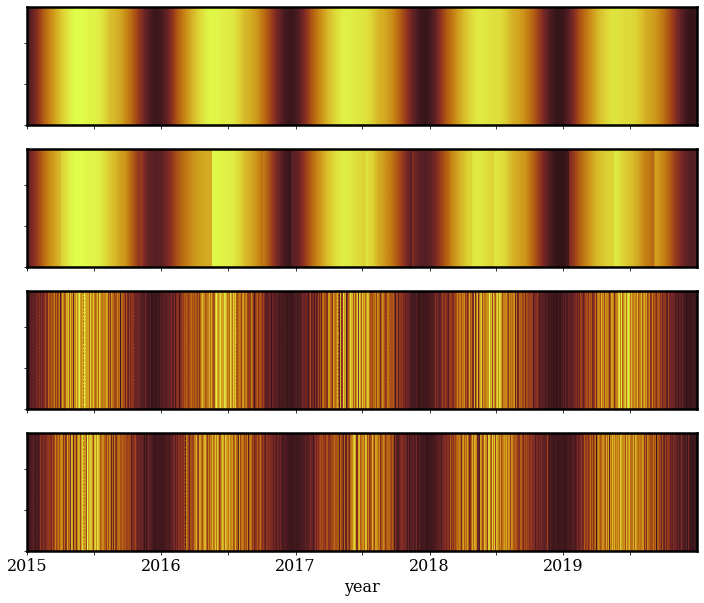

In [18]:
fig, ax = plt.subplots(len(synth_name), 1, figsize=(12, 10), sharex=True)

days    = np.unique(df[synth_name[0]].index.date)
minutes = np.unique(df[synth_name[0]].minute_of_day)

for i in range(len(synth_name)):
    
    name      = synth_name[i]
    power_day = df_day[name].Power.to_numpy()
    
    yi, xi    = np.meshgrid(minutes, days)
    zi        = df[name].Power.to_numpy()
    zi        = zi.reshape(xi.shape)
    
    for j in range(len(days)):
        zi[j, :] = power_day[j]
    
    im = ax[i].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=cmap, rasterized=True)
    if i==(len(synth_name)-1):
        ax[i].set_xlabel("year")
        labels_x = [item.get_text() for item in ax[i].get_xticklabels()]
        labels_x = ["2015", "", "2016", "", "2017", "", "2018", "", "2019", ""]
        ax[i].set_xticklabels(labels_x)#, rotation=45)
    
    labels_y = [item.get_text() for item in ax[i].get_yticklabels()]
    labels_y = ["", "", ""]
    ax[i].set_yticklabels(labels_y)
    #ax[i].set_ylabel("time of day")
fig.savefig("../../plots/power_all_downsampling.png", bbox_inches='tight')